In [1]:
# project: p8
# submitter-netid: shizmi
# partner-netid: modonnell7

In [2]:
import csv
import copy
import matplotlib, pandas
import statistics
import collections

def get_mapping(path):
    path_file = open(path)
    file_reader = csv.reader(path_file)
    map_data = dict(file_reader)
    return map_data

In [3]:
#q1
myMap = get_mapping("small_mapping.csv")
myMap

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [4]:
#q2
value = myMap.get("tt0313542")
value

'Runaway Jury'

In [5]:
#q3
myList = []
for key in myMap:
    if 'tt' in key:
        if myMap.get(key) not in myList:
            myList.append(myMap.get(key))
myList

['Runaway Jury', 'Lethal Weapon']

In [6]:
#q4
myKeyList = []
for key in myMap:
    if 'gary' in myMap.get(key).lower():
        if key not in myKeyList:
            myKeyList.append(key)
myKeyList

['nm0000997', 'nm0001219']

In [7]:
def get_raw_movies(path):
    path_file = open(path)
    file_reader = csv.reader(path_file)
    raw_movies_data = list(file_reader)
    header = raw_movies_data[0]
    raw_movies_data = raw_movies_data[1:]
    movies_list = []
    for rows in range(len(raw_movies_data)):
        movies_dict = {}
        for col in range(len(header)):
            if header[col] == 'year':
                movies_dict[header[col]] = int(raw_movies_data[rows][col])
                continue
            if header[col] == 'rating':
                movies_dict[header[col]] = float(raw_movies_data[rows][col])
                continue
            if col > 2:
                movies_dict[header[col]] = raw_movies_data[rows][col].split(",")
                continue
            movies_dict[header[col]] = raw_movies_data[rows][col]
        movies_list.append(movies_dict)
    return movies_list

In [8]:
#q5
raw_movies = get_raw_movies("small_movies.csv")
raw_movies

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [9]:
#q6
len(raw_movies[0]['genres'])

3

In [10]:
#q7
raw_movies[1]['actors'][-1]

'nm0752751'

In [11]:
def get_movies(movies_path, mapping_path):
    myMap = get_mapping(mapping_path)
    movies = get_raw_movies(movies_path)
    for keys in myMap:
        for i in range(len(movies)):
            for keys2 in movies[0]:
                if movies[i][keys2] == keys:
                    movies[i][keys2] = myMap.get(keys)
                if type(movies[i][keys2]) == list:
                    for j in range(len(movies[i][keys2])):
                        if movies[i][keys2][j] == keys:
                            movies[i][keys2][j] = myMap.get(keys)
    return movies

In [12]:
#q8
small = get_movies("small_movies.csv","small_mapping.csv")
small[0]['title']

'Runaway Jury'

In [13]:
#q9
small[1]["directors"]

['Richard Donner']

In [14]:
#q10
small[-1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [15]:
#q11
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [16]:
#q12
movies = get_movies("movies.csv", "mapping.csv")
movies[:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [17]:
#q13
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [18]:
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [19]:
#q14
mov = copy.deepcopy(movies)
filter_movies_by_year(mov,1930)

[{'title': 'Hook Line and Sinker',
  'year': 1930,
  'rating': 6.4,
  'directors': ['Edward F. Cline'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Ralf Harolde'],
  'genres': ['Comedy', 'Romance']},
 {'title': 'The Big Trail',
  'year': 1930,
  'rating': 7.2,
  'directors': ['Raoul Walsh', 'Louis R. Loeffler'],
  'actors': ['John Wayne', 'El Brendel', 'Tully Marshall'],
  'genres': ['Adventure', 'Romance', 'Western']}]

In [20]:
#q15
mov = copy.deepcopy(movies)
filter_movies_by_year(mov,1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [21]:
def unique(name):
    number = 0
    listOfNames = []
    for i in range(len(movies)):
        for key in movies[0]:
            if key == name:
                for j in range(len(movies[i][name])):
                    if movies[i][name][j] not in listOfNames:
                        number+=1
                        listOfNames.append(movies[i][name][j])
    return number

In [22]:
#q16
unique('genres')

18

In [23]:
#q17
unique('actors')

2605

In [24]:
#q18
unique('directors')

1247

In [25]:
#q19
total = 0
count = 0
for i in range(len(movies)):
    for key in movies[0]:
        if key == 'rating':
            total+=movies[i]['rating']
            count+=1
total/count

6.401659528907912

In [26]:
#q20
longest = 0
title = ''
for i in range(len(movies)):
    for key in movies[0]:
        if key == 'title':
            if longest < len(movies[i][key]):
                longest = int(len(movies[i][key]))
                title = movies[i][key]
title

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [27]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [28]:
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [29]:
def bucketize(movie_list, movie_key):
    bucket = {}
    for j in range(len(movie_list)):
        if type(movie_list[j][movie_key]) == list:
            for genre in movie_list[j][movie_key]:
                bucket[genre] = None
        else:
            bucket[movie_list[j][movie_key]] = None
            
    for keys in bucket:
        listStuff = []
        for i in range(len(movie_list)):
            if type(movie_list[i][movie_key]) == list:
                for j in range(len(movie_list[i][movie_key])):
                    if keys == movie_list[i][movie_key][j]:
                        if movie_list[i] not in listStuff:
                            listStuff.append(movie_list[i])
                            bucket[keys] = listStuff
            elif keys == movie_list[i][movie_key]:
                if movie_list[i] not in listStuff:
                    listStuff.append(movie_list[i])
                    bucket[keys] = listStuff
            
    return bucket

In [30]:
#q21
bucketize(test_movies , "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [31]:
#q22
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [32]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [33]:
#q24
bucketize(small,"genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [34]:
#q25
len(bucketize(small, "actors"))

7

In [35]:
#q26
len(bucketize(movies, "genres"))

18

In [36]:
def avg_len(bucket,key):
    total = 0
    for dictionary in bucket:
        for keys in dictionary:
            if keys == key:
                total += 1
    return total

In [37]:
#q27
summary = {}
bucket = bucketize(movies,"genres")
for k in bucket:
    summary[k] = avg_len(bucket[k],"genres")

summary

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [38]:
def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

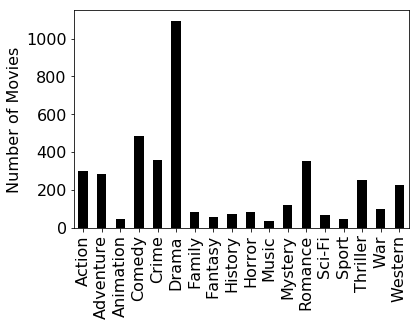

In [39]:
#q28
%matplotlib inline
plot_dict(summary,"Number of Movies")

In [40]:
def countBefore(bucket,key):
    total = 0
    for dictionary in bucket:
        for keys in dictionary:
            if keys == key:
                if dictionary['year'] < 2000:
                    total += 1
    return total
def countAfter(bucket,key):
    total = 0
    for dictionary in bucket:
        for keys in dictionary:
            if keys == key:
                if dictionary['year'] >= 2000:
                    total += 1
    return total

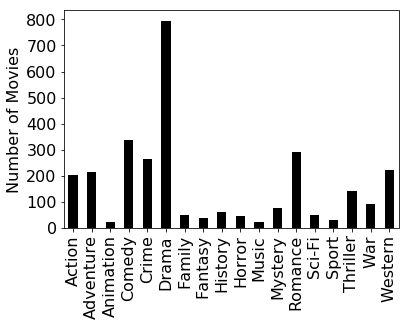

In [41]:
#q29
summary2 = {}
bucket2 = bucketize(movies,"genres")
for k in bucket2:
    for i in range(len(bucket2[k])):
        summary2[k] = countBefore(bucket2[k],"year")
        
plot_dict(summary2,"Number of Movies")

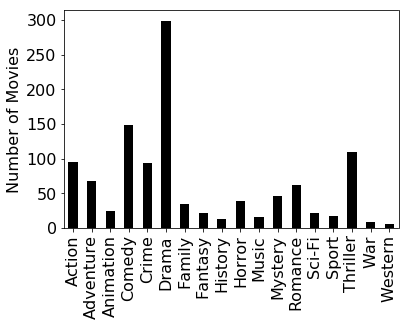

In [42]:
#q30
summary2 = {}
bucket2 = bucketize(movies,"genres")
for k in bucket2:
    for i in range(len(bucket2[k])):
            summary2[k] = countAfter(bucket2[k],"year")
        
plot_dict(summary2,"Number of Movies")

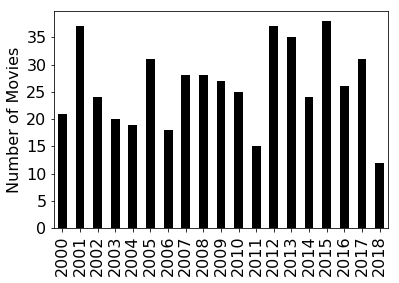

In [43]:
#q31
summary2 = {}
bucket2 = bucketize(movies,"year")
for k in bucket2:
    for i in range(len(bucket2[k])):
            summary2[k] = countAfter(bucket2[k],"year")
            if summary2[k] == 0:
                del summary2[k]
plot_dict(summary2,"Number of Movies")

In [44]:
def careerSpan(bucket,name):
    earliest = 20000
    latest = 0
    span = 0
    for names in bucket:
        if names == name:
            for i in range(len(bucket[names])):
                if earliest > bucket[names][i]['year']:
                    earliest = bucket[names][i]['year']
                if latest < bucket[names][i]['year']:
                    latest = bucket[names][i]['year']
    span = latest - earliest
    return span

In [45]:
#q32
careers = {}
directors = bucketize(movies,"directors")
for name in directors:
    span = careerSpan(directors,name)
    if span >= 30:
        careers[name] = span
careers

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [46]:
#q33
careers = {}
actors = bucketize(movies,"actors")
for name in actors:
    span = careerSpan(actors,name)
    if span >= 40:
        careers[name] = span
careers

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Dennis Quaid': 40,
 'Marlon Brando': 49,
 'Armand Assante': 40,
 'Eddie Albert': 41,
 'Jon Voight': 44,
 'Tony Curtis': 45,
 'Michael Constantine': 42,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Fredric March': 41,
 'Lloyd Bridges': 44,
 'Robert Redford': 44,
 'Dean Stockwell': 53}

In [47]:
def row_ranking(row):
    return row["span"]

def top_n_span(buckets, n):
    spans = buckets
    rows = []
    for name in spans:
        span = careerSpan(spans,name)
        rows.append({"name": name, "span": span})

    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]

In [48]:
#q34
directors = bucketize(movies,"directors")
top_n_span(directors,10)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [49]:
#q35
actors = bucketize(movies,"actors")
top_n_span(actors,10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [50]:
summary = {}
bucket = bucketize(movies,"genres")
for k in bucket:
    summary[k] = avg_len(bucket[k],"genres")
def row_ranking(row):
    return row["rating"]

def avg_rating(buckets,name):
    ratingList = []
    for names in buckets:
        if name==names:
            for i in range(len(buckets[names])):
                ratingList.append(buckets[names][i]['rating'])
    return ratingList

def top_n_span_of(buckets, n):
    spans = buckets
    rows = []
    for name in spans:
        rating = avg_rating(spans,name)
        rows.append({"category": name, "rating": statistics.median(rating), "count": summary[name]})

    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]

In [51]:
#q36
genres = bucketize(movies,"genres")
top_n_span_of(genres,3)

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [52]:
summary = {}
bucket = bucketize(movies,"year")
for k in bucket:
    summary[k] = avg_len(bucket[k],"genres")

def top_n_span_of2(buckets, n):
    spans = buckets
    rows = []
    for name in spans:
        rating = avg_rating(spans,name)
        rows.append({"category": name, "rating": statistics.median(rating), "count": summary[name] })

    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]

#q37
years = bucketize(movies,"year")
top_n_span_of2(years,10)

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [53]:
#q38
summary = {}
bucket = bucketize(movies,"year")
for k in bucket:
    summary[k] = avg_len(bucket[k],"genres")

def top_n_span_of3(buckets, n):
    spans = buckets
    rows = []
    for name in spans:
        rating = avg_rating(spans,name)
        if summary[name] >= 10:
            rows.append({"category": name, "rating": statistics.median(rating), "count": summary[name] })

    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]

years = bucketize(movies,"year")
top_n_span_of3(years,5)

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [54]:
#q39
summary = {}
bucket = bucketize(movies,"directors")
for k in bucket:
    summary[k] = avg_len(bucket[k],"genres")

def top_n_span_of3(buckets, n, amount = 0):
    spans = buckets
    rows = []
    for name in spans:
        rating = avg_rating(spans,name)
        if summary[name] >= amount:
            rows.append({"category": name, "rating": statistics.median(rating), "count": summary[name] })


    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]

directors = bucketize(movies,"directors")
top_n_span_of3(directors,6,3)

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'category': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'category': 'Andrew Grieve', 'rating': 8.2, 'count': 6}]

In [55]:
#q40
summary = {}
bucket = bucketize(movies,"actors")
for k in bucket:
    summary[k] = avg_len(bucket[k],"genres")

def top_n_span_of3(buckets, n, amount = 0):
    spans = buckets
    rows = []
    for name in spans:
        rating = avg_rating(spans,name)
        if summary[name] >= amount:
            rows.append({"category": name, "rating": statistics.median(rating), "count": summary[name] })

    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]
actors = bucketize(movies,"actors")
top_n_span_of3(actors,3,5)

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]